<a href="https://colab.research.google.com/github/VPivato/Algoritmos-Bioinspirados/blob/main/redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento da base de dados

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # Entrada -> Camadas ocultas -> Saída
from tensorflow.keras.layers import Dense # Representa que cada neurônio vai estar ligado a todos os outros
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from numpy import argmax

In [ ]:
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data() # Carrega a base de dados de números
"""Treinamento: base de dados usada para treinar a rede neural
   x_treinamento: armazena os pixels das imagens
   y_treinamento: armazena as respostas esperadas

   Teste: base de dados usada para testar a rede neural
   x_teste: armazena os pixels das imagens
   y_teste: armazena as respostas esperadas
"""

'Treinamento: base de dados usada para treinar a rede neural\n   x_treinamento: armazena os pixels das imagens\n   y_treinamento: armazena as respostas esperadas\n   \n   Teste: base de dados usada para testar a rede neural\n   x_teste: armazena os pixels das imagens\n   y_teste: armazena as respostas esperadas\n'

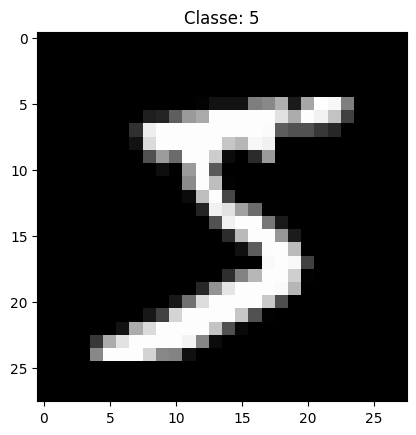

In [ ]:
plt.imshow(x_treinamento[0].reshape(28, 28), cmap="gray")
plt.title("Classe: " + str(y_treinamento[0]));

In [ ]:
x_treinamento.shape # 60000 imagens 28x28 pixels
x_teste.shape # 10000 imagens 28x28 pixels

(10000, 28, 28)

In [ ]:
x_treinamento = x_treinamento.reshape(60000, 28 * 28) # Para trabalhar com redes neurais é preciso transformar de matriz para vetor
x_teste = x_teste.reshape(10000, 28 * 28)

# Pré-Processamento das Imagens

In [ ]:
x_treinamento = x_treinamento.astype("float32") # Transforma de int para float32
x_teste = x_teste.astype("float32")

In [ ]:
x_treinamento = x_treinamento / 255 # Normalização dos dados em uma escala menor (aumenta eficiência)
x_teste = x_teste / 255

In [ ]:
y_treinamento[0] # Número 5

np.uint8(5)

In [ ]:
y_treinamento = to_categorical(y_treinamento) # Representação dos valores em uma lista de 10 indices, representando os numeros de 0 a 9
y_treinamento[0] # 0 representa que não é aquele número, 1 significa que é aquele número. Nesse caso, o sexto indice representa o numero 5 (contando do 0)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
y_teste = to_categorical(y_teste) # Mesmo processo com a base de testes

# Arquitetura e treinamento de redes neurais

In [ ]:
# 784 -> 397 -> 397 -> 10
# Entradas -> camada oculta -> camada oculta > Saída
rede_neural = Sequential()
rede_neural.add(Dense(input_shape=(784, ), # Quantidade de neurônios na camada de entrada
                      units=397, # Ligação entre camada de entrasda com a primeira camada oculta
                      activation="relu" # Função de ativação (relu, softmax, sigmoid etc)
                      ))
# Ligação entre primeira camada oculta com a segunda camada oculta
rede_neural.add(Dense(units=397, activation="relu"))
# Adição da camada de saída
rede_neural.add(Dense(units=10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Definição de alguns parâmetros
rede_neural.compile(loss="categorical_crossentropy", # Calculo do erro
                    optimizer="adam", # Algoritmo de atualização dos pesos, descida do gradiente melhorada
                    metrics=["accuracy"] # Métricas para avaliação, precisão de acerto
                    )

In [ ]:
# Treinamento da rede neural
historico = rede_neural.fit(x_treinamento, y_treinamento,
                            batch_size=128, # batch_size=128 > atualização dos pesos de 128 em 128
                            epochs=50 # Número de épocas/gerações/iterações
                            )

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8777 - loss: 0.4196
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9736 - loss: 0.0875
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9831 - loss: 0.0548
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9887 - loss: 0.0364
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9913 - loss: 0.0280
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9936 - loss: 0.0203
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9943 - loss: 0.0175
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9950 - loss: 0.0161
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9951 - loss: 0.0137
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9951 - loss: 0.0154
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9958 - loss: 0.0124
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━

# Avaliação

In [ ]:
historico.history.keys()

dict_keys(['accuracy', 'loss'])

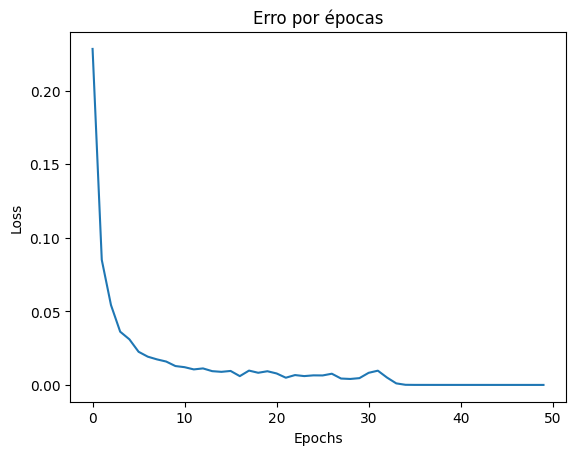

In [ ]:
plt.plot(historico.history["loss"])
plt.title("Erro por épocas")
plt.xlabel("Epochs")
plt.ylabel("Loss");

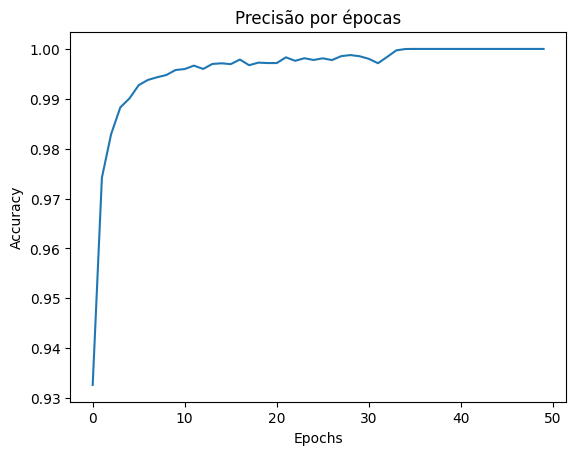

In [ ]:
plt.plot(historico.history["accuracy"])
plt.title("Precisão por épocas")
plt.xlabel("Epochs")
plt.ylabel("Accuracy");

In [ ]:
rede_neural.evaluate(x_teste, y_teste) # Com a rede neural já treinada, testa com a base de dados de teste

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9850 - loss: 0.1164


[0.10015477240085602, 0.9868999719619751]

In [ ]:
previsoes = rede_neural.predict(x_teste) # Outra forma de testar a rede neural treinada

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(previsoes[1]) # Mostra a probabilidade que a rede neural definiu de ser cada número
print(y_teste[1]) # Resposta
# Acertou

[4.2379127e-26 2.5229798e-17 9.9999994e-01 8.2876870e-26 3.3323170e-35
 6.2922953e-28 8.6083531e-22 5.4526685e-24 3.2146230e-21 1.3229091e-33]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Text(0.5, 1.0, 'Classe: 2')

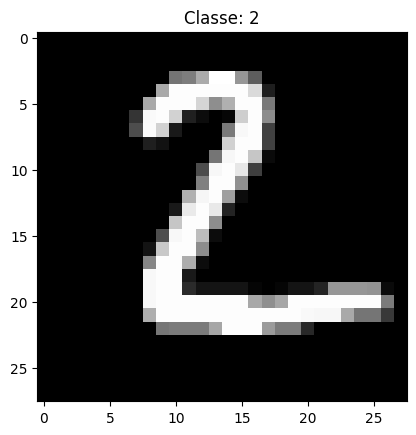

In [ ]:
plt.imshow(x_teste[1].reshape(28, 28), cmap="gray")
plt.title("Classe: " + str(argmax(y_teste[1]))) # argmax retorna o índice do maior valor de um vetor

# Classifição de uma única imagem

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
imagem_teste = cv2.imread("/content/digito.png")

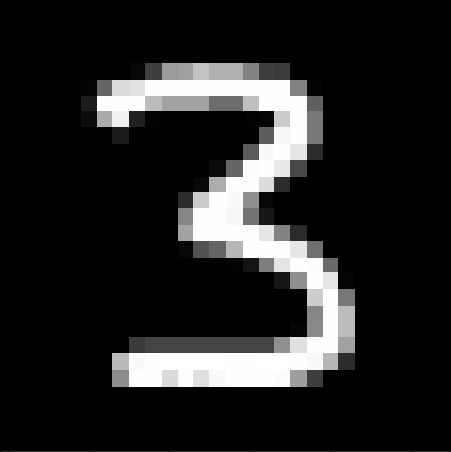

In [ ]:
cv2_imshow(imagem_teste)

In [ ]:
imagem_teste.shape # Vai ser preciso redimensionar para 28x28, pois foi nessa escala que a rede neural foi treinada
# Também é preciso retirar o terceiro indice

(452, 451, 3)

In [ ]:
imagem_teste = cv2.resize(imagem_teste, (28, 28))

In [ ]:
imagem_teste = cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2GRAY)
imagem_teste.shape

(28, 28)

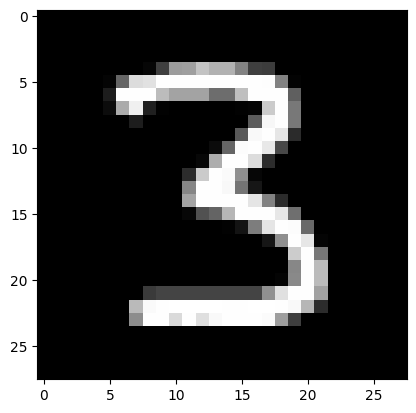

In [ ]:
plt.imshow(imagem_teste, cmap="gray");

In [ ]:
imagem_teste = imagem_teste.reshape(1, 28 * 28) # Transforma de matriz para vetor
imagem_teste.shape

(1, 784)

In [ ]:
imagem_teste = imagem_teste.astype("float32")

In [ ]:
imagem_teste = imagem_teste / 255 # Normalização para a mesma escala de valores em que a rede neural foi treinada

In [ ]:
previsao = rede_neural.predict(imagem_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
previsao

array([[0.00000000e+00, 5.70668553e-37, 7.88909156e-34, 1.00000000e+00,
        0.00000000e+00, 1.00036325e-36, 0.00000000e+00, 0.00000000e+00,
        1.19302222e-32, 0.00000000e+00]], dtype=float32)

In [ ]:
argmax(previsao)

np.int64(3)